In [456]:
# Imports
import numpy as np
from matplotlib import rc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [457]:
# Formatting plots
plt.rcParams["axes.formatter.use_mathtext"] = True

sns.set(font="cmr10")
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid", context="paper", font="cmr10")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1})
sns.set_palette("flare")

In [458]:
# Utils
def save_figure(name):
    plt.savefig(f"exports/{name}.pdf", format="pdf", bbox_inches="tight")

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

In [459]:
# Data import

data = pd.read_csv('datasets/responses.csv')
data.sort_values(by='Responded At', inplace=True)
data.describe()

,[Participant] Age,[Participant] Reddit Usage,[Participant] Social Media Usage,[Participant] Fake News Ability,[Credibility] Credibility Rating,[Credibility] Topic familiarity,[Post] Title Sentiment,[Post] Award Count,[Post] Comments,[Post] Upvote Ratio,[Post] Upvotes
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.0,952.000000,952.000000,952.000000
mean,39.191176,2.955882,4.382353,3.500000,3.139706,2.404412,-0.063990,0.0,252.053571,0.857941,3721.867647
std,15.470851,1.333917,1.164143,0.916033,1.147584,1.248891,0.162211,0.0,550.073099,0.154541,10038.217945
min,19.000000,1.000000,1.000000,2.000000,1.000000,1.000000,-0.416667,0.0,0.000000,0.500000,0.000000
25%,25.750000,2.000000,4.000000,3.000000,2.000000,1.000000,-0.128205,0.0,11.500000,0.850000,0.000000
50%,34.500000,3.000000,5.000000,4.000000,3.000000,2.000000,-0.060036,0.0,74.000000,0.920000,226.000000
75%,50.000000,4.000000,5.000000,4.000000,4.000000,3.000000,0.066667,0.0,179.000000,0.960000,2228.000000
max,90.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.200000,0.0,3121.000000,1.000000,54947.000000


In [460]:
# Columns
participant = "Participant ID"

gender = "[Participant] Gender"
studies = "[Participant] Studies Level"
age = "[Participant] Age"
social_usage = "[Participant] Social Media Usage"
reddit_usage = "[Participant] Reddit Usage"
fake_news_ability = "[Participant] Fake News Ability"
reddit_as_news = "[Participant] Reddit As News Source"
reddit_credibility_evaluation = "[Participant] Reddit Credibility Evaluation"

credibility = "[Credibility] Credibility Rating"
would_upvote = "[Credibility] Would upvote"
would_upvote_reason = "[Credibility] Would upvote reason"
topic_familiarity = "[Credibility] Topic familiarity"
content_style = "[Credibility] Content Style"
content_style_effect = "[Credibility] Content Style Effect"

upvotes = "[Post] Upvotes"
ratio = "[Post] Upvote Ratio"
comments = "[Post] Comments"
title = "[Post] Title"

In [461]:
by_posts = data[[upvotes, comments, title, credibility, gender]].groupby([title, upvotes, comments, gender])[credibility].mean().reset_index()
by_posts.head()

,[Post] Title,[Post] Upvotes,[Post] Comments,[Participant] Gender,[Credibility] Credibility Rating
0,A,51,5,female,3.363636
1,A,51,5,male,3.750000
2,A,203,10,female,3.416667
3,A,203,10,male,3.333333
4,A,2911,81,female,3.777778


In [462]:
by_upvotes = by_posts.groupby(by=[upvotes, title])[credibility].mean().reset_index()
by_upvotes_gender = by_posts.groupby(by=[upvotes, title, gender])[credibility].mean().reset_index()

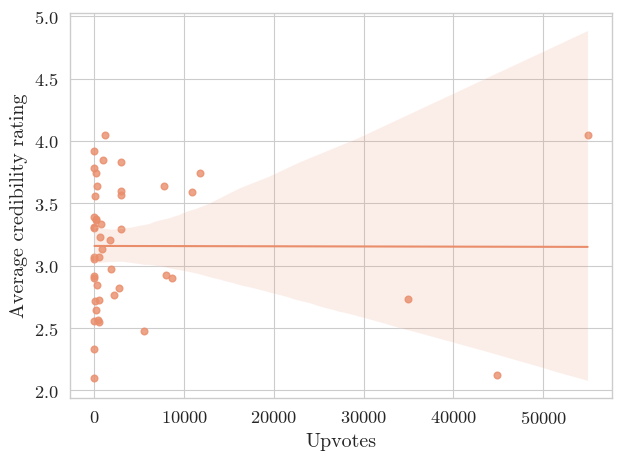

In [615]:
# Credibility regression by upvotes (all)
plot = sns.regplot(data=by_upvotes, x=upvotes, y=credibility)
plot.figure.set_size_inches(7,5)
plot.set(xlabel="Upvotes", ylabel="Average credibility rating")
save_figure("avg_credibility_by_upvotes")

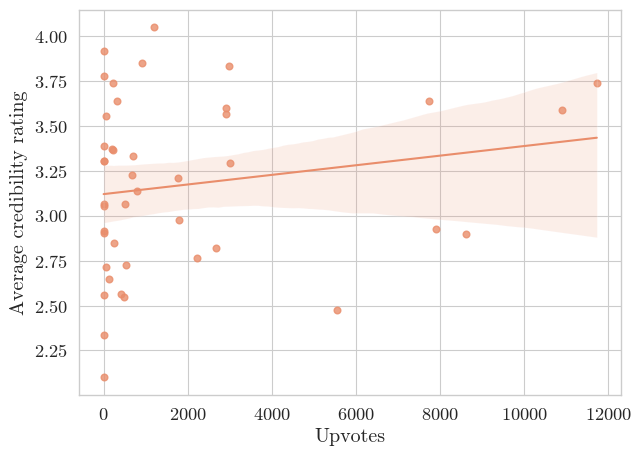

In [464]:
# Credibility regression by upvotes (all < 30000)
plot = sns.regplot(data=by_upvotes[by_upvotes[upvotes] < 30000], x=upvotes, y=credibility)
plot.figure.set_size_inches(7,5)
plot.set(xlabel="Upvotes", ylabel="Average credibility rating")
save_figure("credibility_by_upvotes_zoomed")

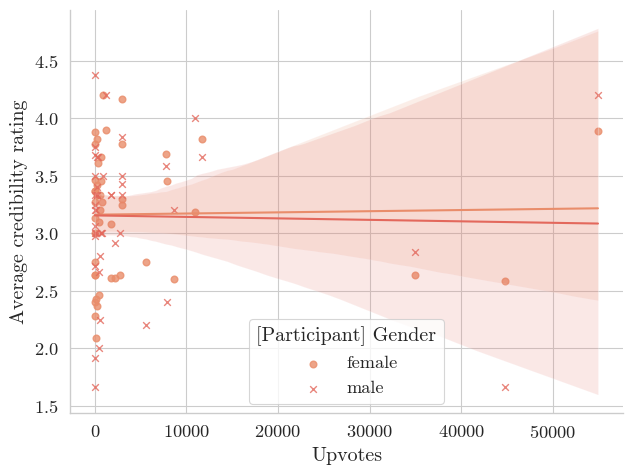

In [465]:
# Credibility regression by upvotes (by gender)
plot = sns.lmplot(
    data=by_upvotes_gender,
    x=upvotes,
    y=credibility,
    hue=gender,
    markers=["o", "x"],
    facet_kws={"legend_out": False},
)
plot.figure.set_size_inches(7, 5)
plot.set(xlabel="Upvotes", ylabel="Average credibility rating")
save_figure("credibility_by_upvotes_gender")

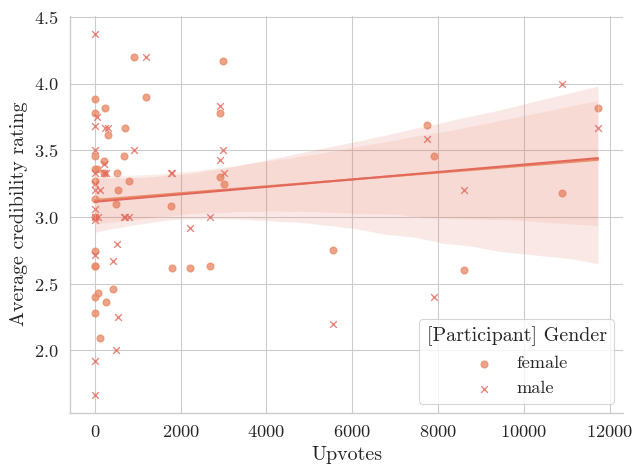

In [466]:
# Credibility regression by upvotes (by gender < 30000)
plot = sns.lmplot(
    data=by_upvotes_gender[by_upvotes_gender[upvotes] < 30000],
    x=upvotes,
    y=credibility,
    hue=gender,
    markers=["o", "x"],
    facet_kws={"legend_out": False}
)
plot.figure.set_size_inches(7, 5)
plot.set(xlabel="Upvotes", ylabel="Average credibility rating")
save_figure("credibility_by_upvotes_gender_zoomed")

In [467]:
# stats.spearmanr(by_upvotes[upvotes], by_upvotes[credibility])
filtered = data
stats.kendalltau(filtered[upvotes], filtered[credibility])

SignificanceResult(statistic=0.04057892805921243, pvalue=0.1045395200224074)

In [468]:
by_content_style = data.groupby(by=[content_style, gender])[credibility].mean().reset_index().sort_values(by=credibility)
by_content_style

,[Credibility] Content Style,[Participant] Gender,[Credibility] Credibility Rating
13,offensive,male,1.571429
12,offensive,female,1.750000
9,misleading-title,male,1.923077
8,misleading-title,female,1.986486
2,disagreement,female,2.057143
3,disagreement,male,2.083333
7,jargony,male,2.363636
6,jargony,female,2.758621
11,none,male,2.989691
10,none,female,3.145833


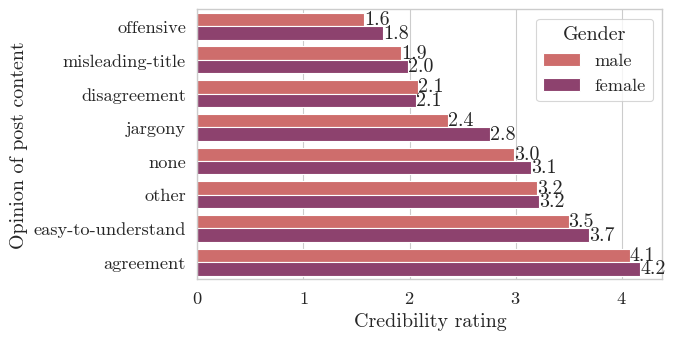

In [469]:
plot = sns.barplot(by_content_style, y=content_style, x=credibility, palette="flare", orient="h", hue=gender)
plot.set_xlabel("Credibility rating")
plot.set_ylabel("Opinion of post content")
plot.legend_.set_title("Gender")
plot.figure.set_size_inches(6, 3.5)

for container in plot.containers:
    plot.bar_label(container, fmt='%.1f')

save_figure("credibility_by_content_style")

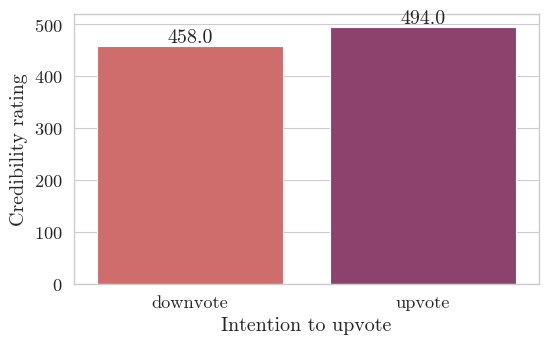

In [470]:
subset = data[[credibility, would_upvote]].groupby(by=[would_upvote])[credibility].count().reset_index()

plot = sns.barplot(subset, x=would_upvote, y=credibility, palette="flare")

for container in plot.containers:
    plot.bar_label(container, fmt='%.1f')

plot.set_xlabel("Intention to upvote")
plot.set_ylabel("Credibility rating")
plot.figure.set_size_inches(6, 3.5)
save_figure("credibility_by_would_upvote")

In [525]:
raw_familiarity = data.groupby(by=[topic_familiarity, credibility])[credibility].count().reset_index(name='Freq').rename(columns={ credibility: 'Credibility', topic_familiarity: 'Familiarity'})
raw_familiarity.to_excel("exports/familiarity.xlsx")

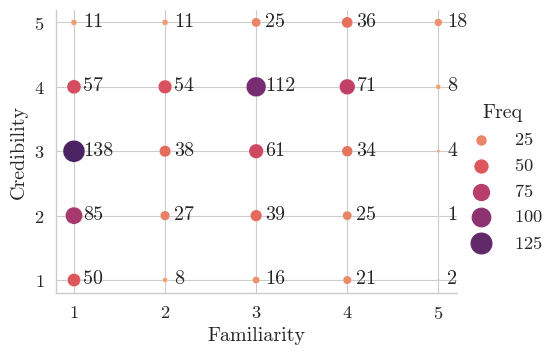

In [592]:
plot = sns.relplot(
    raw_familiarity,
    y="Credibility",
    x="Familiarity",
    size="Freq",
    sizes=(1, 250),
    hue="Freq",
    palette="flare",
    # kde=True
)
plot.figure.set_size_inches(6, 3.5)

ax = plot.axes[0, 0]
for idx, row in raw_familiarity.iterrows():
    x = row[0]
    y = row[1]
    text = row[2]
    ax.text(x + 0.1, y - 0.06, text, horizontalalignment="left")

save_figure("familiarity_credibility_frequency")

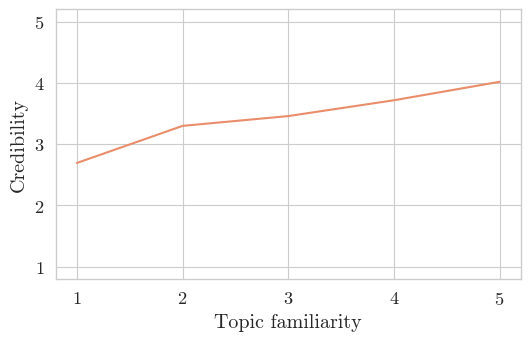

In [591]:
plot = sns.regplot(
    data,
    x=topic_familiarity,
    y=credibility,
    lowess=True,
    scatter_kws={"alpha": 0},
)
plot.figure.set_size_inches(6, 3.5)

plot.set_xlabel("Topic familiarity")
plot.set_ylabel("Credibility")
save_figure("familiarity_credibility_regression")

/home/arpad/projects/thesis_project/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


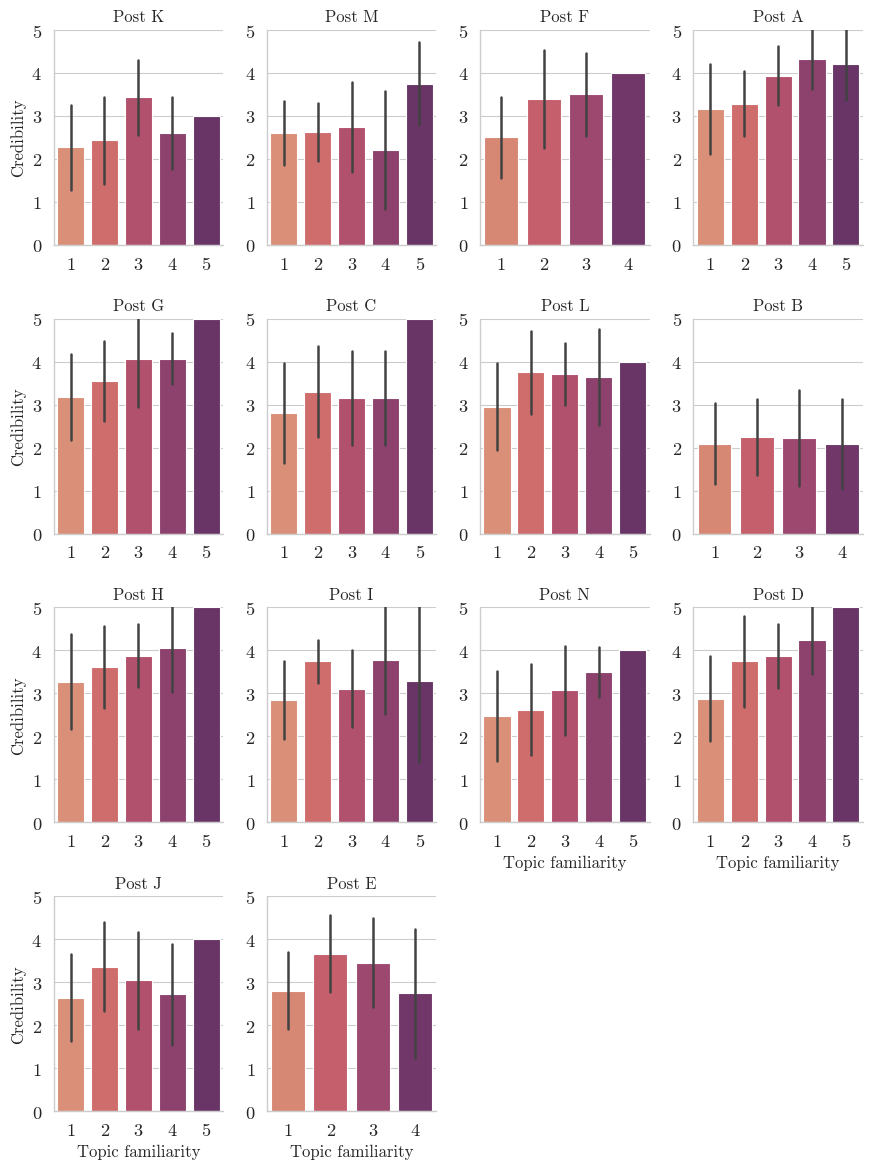

In [490]:
grid = sns.FacetGrid(
    data, col=title, col_wrap=4, sharex=False, sharey=False, palette="flare",
    height=3, aspect=.75
)
grid.map(sns.barplot, topic_familiarity, credibility, palette="flare", errorbar="sd")
grid.set(ylim=(0, 5))

grid.set_titles("Post {col_name}", size=12)
grid.set_axis_labels("Topic familiarity", "Credibility", fontsize=12)

save_figure("credibility_by_topic_familiarity")

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N']


/home/arpad/projects/thesis_project/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


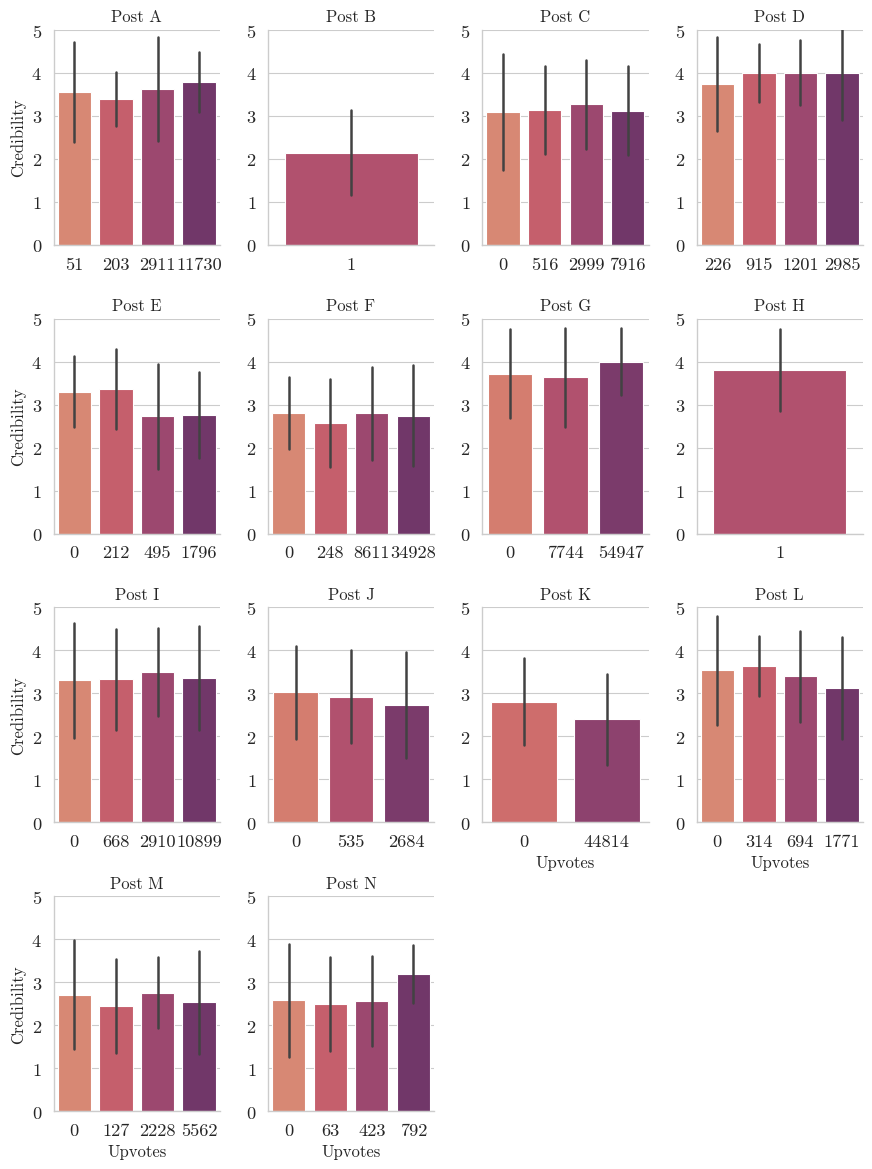

In [607]:
titles = data[title].unique()
titles.sort()
print(titles)

grid = sns.FacetGrid(
    data, col=title, col_wrap=4, sharex=False, sharey=False, palette="flare",
    height=3, aspect=.75, col_order=titles
)
grid.map(sns.barplot, upvotes, credibility, palette="flare", errorbar="sd")
grid.set(ylim=(0, 5))

grid.set_titles("Post {col_name}", size=12)
grid.set_axis_labels("Upvotes", "Credibility", fontsize=12)

save_figure("credibility_by_upvotes")

In [613]:
post_b = data[data[title] == "B"]
post_b[credibility].mean(), post_b[credibility].std()

(2.1470588235294117, 0.9813896008858833)

In [612]:
post_h = data[data[title] == "H"]
post_h[credibility].mean(), post_h[credibility].std()

(3.8088235294117645, 0.9503707515534413)

In [614]:
data[credibility].mean(), data[credibility].std()

(3.139705882352941, 1.1475842672861412)